### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/home/fyodoraev/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [4]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [6]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X=X_tr,y=y_tr)
print(model.predict(X=X_te)[:5])
print(model.score(X_te,y_te))

[20.25082434 13.19358862 22.65713469 36.73795559 16.70410805]
0.7741093349585201


### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [19]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.dot((y_pred-y_real),(y_pred-y_real))/len(y_real)
print(MSE(y_te, model.predict(X=X_te)))
error=mean_squared_error(y_true=y_te, y_pred=model.predict(X=X_te))
print(error)


20.481535259026273
20.481535259026273


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [24]:
naive_model = np.mean(y_tr)
naive_predictions = [naive_model for i in range(len(y_te))]
naive_predictions = np.array(naive_predictions)
print(mean_squared_error(y_true=y_te,y_pred=naive_predictions)) 

90.83770252621758


Печалненький результат

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [31]:
model = linear_model.Ridge()
model.fit(X=X_tr,y=y_tr)
print(model.score(X_te,y_te))


0.7829869184890828


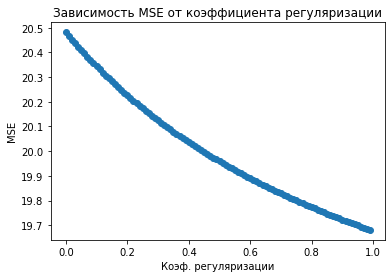

In [30]:
list1=[]
list2=[]
alpha=0
for i in range(100):
  model=linear_model.Ridge(alpha=alpha).fit(X_tr,y_tr)
  predictions = model.predict(X_te)
  list1.append(mean_squared_error(y_true=y_te,y_pred=predictions))
  list2.append(alpha)
  alpha+=0.01
plt.scatter(list2,list1)
plt.title("Зависимость MSE от коэффициента регуляризации")
plt.xlabel('Коэф. регуляризации')
plt.ylabel('MSE')
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [33]:
model1 = linear_model.LinearRegression(fit_intercept=True).fit(X=X_tr,y=y_tr)
model2=linear_model.Ridge(alpha=alpha).fit(X_tr,y_tr)
print(mean_squared_error(y_true=y_te, y_pred=model1.predict(X_te)))
print(mean_squared_error(y_true=y_te,y_pred=model2.predict(X_te)))

20.481535259026273
19.676603633973134


Как мы видим регуляризация на основе гребневой регрессии только ухудшает результат нашей модели, а потому наилучшим коэффициентом является 0 на тестовой части, но все же задача регресии есть обобщить результат, а не показать хорошие значения на тестовой выборке.